# 0 Load data

一般我自己现在处理数据，我大多遵循厘清数据逻辑→测试样本→批量上线→优化输出的步骤。

按照奥姆剃刀原则，若无必要、无增实体。按照我们目前的水平，我们不会涉及图神经网络、不会涉及边界复杂的矢量数据编辑。所以大多操作对于AI很简单，而且一旦看到AI生成高度复杂的代码，第一感觉应该是毙掉它。

## 0.1 Sample test

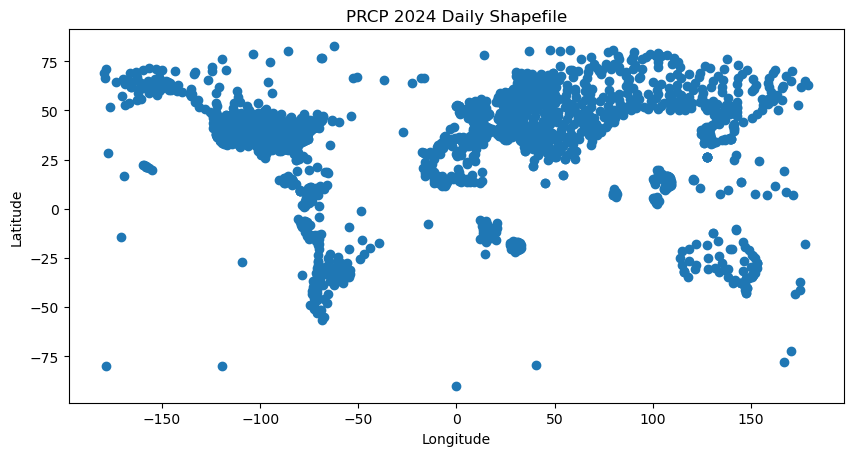

In [36]:
import geopandas as gpd
import os

# Define the path to the shapefile
shapefile_dir = r"D:\world_rain\shp_format"
shapefile_name = "PRCP_1967_daily.shp"
shapefile_path = os.path.join(shapefile_dir, shapefile_name)

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Plot the geodataframe
gdf.plot(figsize=(10, 8))
import matplotlib.pyplot as plt
plt.title("PRCP 2024 Daily Shapefile")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [37]:
gdf[gdf['NAME'].str.endswith('CN', na=False)]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,statement,1967-01-01,1967-01-02,1967-01-03,1967-01-04,...,1967-12-23,1967-12-24,1967-12-25,1967-12-26,1967-12-27,1967-12-28,1967-12-29,1967-12-30,1967-12-31,geometry


In [40]:
# For each row, select the max value from the columns that begin with '2024'
import pandas as pd
import numpy as np

# Reserve only the specified columns and the 2024 columns for further processing
reserved_cols = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']
cols_2024 = [col for col in gdf.columns if col.startswith('2024')]

# Replace 99.99 with NaN, then get the max value for each row (ignoring NaN) 
gdf_filtered = gdf[reserved_cols + cols_2024].copy()  


# Exclude 99.99 for statistics （you can also exclude 0）
def exclude_vals(arr):
    arr = arr.replace(99.99, np.nan)
    # arr = arr.replace(0, np.nan)
    return arr

gdf_filtered.loc[:, 'max_1967'] = exclude_vals(gdf_filtered[cols_2024]).max(axis=1, skipna=True)
gdf_filtered.drop(columns=cols_2024)
# gdf_filtered.loc[:, 'median_2024'] = exclude_vals(gdf_filtered[cols_2024]).median(axis=1, skipna=True)
# gdf_filtered.loc[:, 'q99_2024'] = exclude_vals(gdf_filtered[cols_2024]).quantile(0.99, axis=1, interpolation='linear')

# # Add the second largest value (次大值)
# def second_largest(row):
#     vals = row.replace(99.99, np.nan).dropna()
#     if len(vals) < 2:
#         return np.nan
#     return np.sort(vals)[-2]

# gdf_filtered.loc[:, 'second_max_2024'] = exclude_vals(gdf_filtered[cols_2024]).apply(second_largest, axis=1)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,max_1967
0,03470099999,"HOLBEACH RAF RANGE, UK",52.88300,0.18300,12.0,NaN
1,03562399999,"ALCONBURY RAF AND, UK",52.36700,-0.21700,49.0,NaN
2,03577399999,"MILDENHALL RAF AND, UK",52.36700,0.48300,10.0,NaN
3,03583399999,"LAKENHEATH RAF, UK",52.40000,0.56700,10.0,NaN
4,03595399999,"WOODBRIDGE RAF, UK",52.08300,1.40000,29.0,NaN
...,...,...,...,...,...,...
2077,99999994847,"DETROIT METRO AIRPORT, MI US",42.23130,-83.33080,192.3,NaN
2078,99999994849,"ALPENA CO REGIONAL AIRPORT, MI US",45.07160,-83.56440,208.5,NaN
2079,99999994860,GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...,42.88250,-85.52389,244.8,NaN
2080,99999994866,"CHICAGO MEIGS FIELD, IL US",41.86667,-87.61667,180.1,NaN


## 0.2 Geometry process

In [41]:
from shapely.geometry import Polygon 
import geopandas as gpd
import os

world_shp = gpd.read_file(r"D:\world_rain\Export_Output.shp")
gdf_filtered.drop(columns=cols_2024)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,max_1967
0,03470099999,"HOLBEACH RAF RANGE, UK",52.88300,0.18300,12.0,NaN
1,03562399999,"ALCONBURY RAF AND, UK",52.36700,-0.21700,49.0,NaN
2,03577399999,"MILDENHALL RAF AND, UK",52.36700,0.48300,10.0,NaN
3,03583399999,"LAKENHEATH RAF, UK",52.40000,0.56700,10.0,NaN
4,03595399999,"WOODBRIDGE RAF, UK",52.08300,1.40000,29.0,NaN
...,...,...,...,...,...,...
2077,99999994847,"DETROIT METRO AIRPORT, MI US",42.23130,-83.33080,192.3,NaN
2078,99999994849,"ALPENA CO REGIONAL AIRPORT, MI US",45.07160,-83.56440,208.5,NaN
2079,99999994860,GRAND RAPIDS GERALD R FORD INTERNATIONAL AIRPO...,42.88250,-85.52389,244.8,NaN
2080,99999994866,"CHICAGO MEIGS FIELD, IL US",41.86667,-87.61667,180.1,NaN


In [43]:
world_shp

,GID_0,NAME_0,geometry
0,ABW,Aruba,"POLYGON ((-69.9782 12.46986, -69.97847 12.4698..."
1,AFG,Afghanistan,"POLYGON ((68.52644 31.75435, 68.53852 31.75457..."
2,AGO,Angola,"MULTIPOLYGON (((11.73347 -16.67255, 11.73347 -..."
3,AIA,Anguilla,"MULTIPOLYGON (((-63.42375 18.58903, -63.42375 ..."
4,ALA,?land,"MULTIPOLYGON (((21.32195 59.74986, 21.32195 59..."
...,...,...,...
251,XSP,Spratly Islands,"MULTIPOLYGON (((114.35472 11.45139, 114.35416 ..."
252,YEM,Yemen,"MULTIPOLYGON (((53.26931 12.12875, 53.26931 12..."
253,ZAF,South Africa,"MULTIPOLYGON (((19.42097 -34.67903, 19.42097 -..."
254,ZMB,Zambia,"POLYGON ((25.88753 -17.98407, 25.88284 -17.984..."


In [45]:
# 1. Assign each row in gdf_filtered to a country in world_shp based on LATITUDE and LONGITUDE
# 2. For each country, aggregate 'max_2024' using max, median, and second largest value

# 只清理可能存在的重复索引列
spatial_join_cols = ['index_right', 'index_left','geometry','GID_0'] 
for col in spatial_join_cols:
    if col in gdf_filtered.columns:
        gdf_filtered = gdf_filtered.drop(columns=[col])

# Ensure geometry column exists in gdf_filtered
if 'geometry' not in gdf_filtered.columns:
    from shapely.geometry import Point
    gdf_filtered['geometry'] = gdf_filtered.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)

# Convert to GeoDataFrame if not already
if not isinstance(gdf_filtered, gpd.GeoDataFrame):
    gdf_filtered = gpd.GeoDataFrame(gdf_filtered, geometry='geometry', crs=world_shp.crs)

# Spatial join to assign country to each station
gdf_filtered = gpd.sjoin(gdf_filtered, world_shp[['geometry', 'GID_0']], how='left', predicate='within')

# Aggregate by country
def second_largest(series):
    vals = series.replace(99.99, np.nan).dropna()
    if len(vals) < 2:
        return np.nan
    return np.sort(vals)[-2]

agg_df = gdf_filtered.groupby('GID_0').agg(
    max_2024_max=('max_1967', 'max'),
    max_2024_median=('max_1967', 'median'),
    max_2024_second_max=('max_1967', second_largest)
).reset_index()

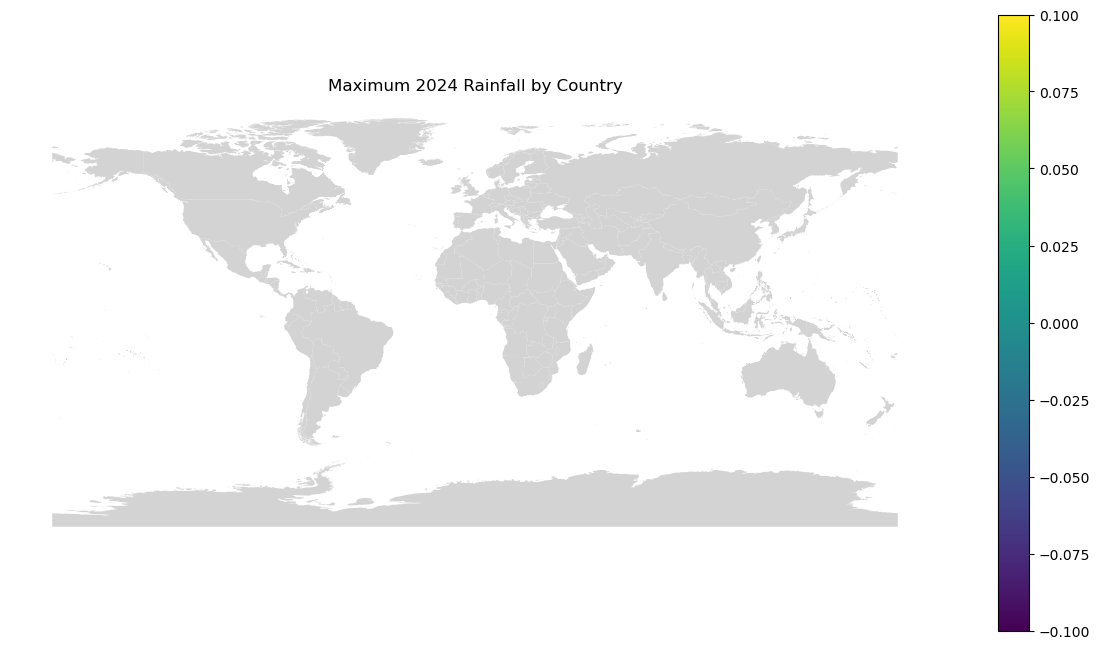

In [48]:
# Merge agg_df with world_shp on 'GID_0'
world_shp_agg = world_shp.merge(agg_df, on='GID_0', how='left')

# Plot the result, coloring by max_2024_max
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
world_shp_agg.plot(column='max_2024_max', ax=ax, legend=True, cmap='viridis', missing_kwds={"color": "lightgrey"})
ax.set_title('Maximum 2024 Rainfall by Country')
ax.axis('off')
plt.show()

In [99]:
# Select countries where max_2024_max is null (NaN)
null_countries = world_shp_agg[world_shp_agg['max_2024_max'].isnull()]
null_countries

,GID_0,NAME_0,geometry,max_2024_max,max_2024_median,max_2024_second_max
6,AND,Andorra,"POLYGON ((1.56324 42.45882, 1.5612 42.45871, 1...",NaN,NaN,NaN
33,BRB,Barbados,"POLYGON ((-59.47375 13.07705, -59.47375 13.076...",NaN,NaN,NaN
36,BVT,Bouvet Island,"MULTIPOLYGON (((3.35745 -54.39033, 3.35833 -54...",NaN,NaN,NaN
54,CUW,Cura?ao,"MULTIPOLYGON (((-68.87764 12.07319, -68.8782 1...",NaN,NaN,NaN
67,ERI,Eritrea,"MULTIPOLYGON (((42.58264 13.17264, 42.58264 13...",NaN,NaN,NaN
90,GRD,Grenada,"MULTIPOLYGON (((-61.78597 11.98903, -61.78597 ...",NaN,NaN,NaN
97,HMD,Heard Island and McDonald Islands,"MULTIPOLYGON (((73.57027 -52.90389, 73.57001 -...",NaN,NaN,NaN
136,MAF,Saint-Martin,"MULTIPOLYGON (((-62.96986 18.12597, -62.96986 ...",NaN,NaN,NaN
138,MCO,Monaco,"MULTIPOLYGON (((7.41338 43.73459, 7.4363 43.75...",NaN,NaN,NaN
169,NRU,Nauru,"POLYGON ((166.92877 -0.55353, 166.92828 -0.553...",NaN,NaN,NaN


# 1 Batch process 

## 1.1 Load data

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import os 
import re

# Define the directory containing the shapefiles
shapefile_dir = r"D:\world_rain\shp_format"
world_shp = gpd.read_file(r"D:\world_rain\Export_Output.shp")

# List to store tuples of (filename, year)
prcp_shp_files = []

# Iterate over files in the directory
for fname in os.listdir(shapefile_dir):
    # Check if the file is a shapefile and starts with 'PRCP_'
    if fname.endswith('.shp') and fname.startswith('PRCP_'):
        # Try to extract the year using regex
        match = re.search(r'PRCP_(\d{4})', fname)
        if match:
            year = match.group(1)
            prcp_shp_files.append((fname, year))

# prcp_shp_files now contains a list of (filename, year) for all matching shapefiles


## 1.2 Generate csv for each country 

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import os
import re
from tqdm import tqdm

# Initialize the final aggregated dataframe
world_shp_agg = world_shp.copy()

# Process each year's shapefile using tqdm for progress indication
for filename, year in tqdm(prcp_shp_files, desc="Processing yearly shapefiles"):
    # Load the shapefile
    shapefile_path = os.path.join(shapefile_dir, filename)
    gdf = gpd.read_file(shapefile_path)
    
    # Reserve only the specified columns and the year columns for further processing
    reserved_cols = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION']
    cols_year = [col for col in gdf.columns if col.startswith(year)]
    
    # Create filtered dataframe
    gdf_filtered = gdf[reserved_cols + cols_year].copy()
    
    # Exclude 99.99 for statistics
    def exclude_vals(arr):
        arr = arr.replace(99.99, np.nan)
        return arr
    
    # Calculate maximum value for the year
    gdf_filtered.loc[:, f'max_{year}'] = exclude_vals(gdf_filtered[cols_year]).max(axis=1, skipna=True)
    
    # Clean up any existing spatial join columns
    spatial_join_cols = ['index_right', 'index_left', 'geometry', 'GID_0']
    for col in spatial_join_cols:
        if col in gdf_filtered.columns:
            gdf_filtered = gdf_filtered.drop(columns=[col])
    
    # Ensure geometry column exists
    if 'geometry' not in gdf_filtered.columns:
        gdf_filtered['geometry'] = gdf_filtered.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
    
    # Convert to GeoDataFrame
    if not isinstance(gdf_filtered, gpd.GeoDataFrame):
        gdf_filtered = gpd.GeoDataFrame(gdf_filtered, geometry='geometry', crs=world_shp.crs)
    
    # Spatial join to assign country to each station
    gdf_filtered = gpd.sjoin(gdf_filtered, world_shp[['geometry', 'GID_0']], how='left', predicate='within')
    
    # Aggregate by country for this year, including max, median, and second max (excluding 99.99)
    def second_largest(series):
        vals = series.replace(99.99, np.nan).dropna()
        if len(vals) < 2:
            return np.nan
        return np.sort(vals)[-2]

    agg_df_year = gdf_filtered.groupby('GID_0').agg(
        **{f'max_{year}_max': (f'max_{year}', 'max'),
           f'max_{year}_mean': (f'max_{year}', 'mean'),
           f'max_{year}_second_max': (f'max_{year}', second_largest)}
    ).reset_index()
    # Merge with world_shp_agg
    world_shp_agg = world_shp_agg.merge(agg_df_year, on='GID_0', how='left')

print("All years processed successfully!")

print(f"Final columns: {world_shp_agg.columns.tolist()}")

Processing yearly shapefiles: 100%|██████████| 96/96 [05:50<00:00,  3.65s/it]

All years processed successfully!
Final columns: ['GID_0', 'NAME_0', 'geometry', 'max_1929_max', 'max_1929_mean', 'max_1929_second_max', 'max_1930_max', 'max_1930_mean', 'max_1930_second_max', 'max_1931_max', 'max_1931_mean', 'max_1931_second_max', 'max_1932_max', 'max_1932_mean', 'max_1932_second_max', 'max_1933_max', 'max_1933_mean', 'max_1933_second_max', 'max_1934_max', 'max_1934_mean', 'max_1934_second_max', 'max_1935_max', 'max_1935_mean', 'max_1935_second_max', 'max_1936_max', 'max_1936_mean', 'max_1936_second_max', 'max_1937_max', 'max_1937_mean', 'max_1937_second_max', 'max_1938_max', 'max_1938_mean', 'max_1938_second_max', 'max_1939_max', 'max_1939_mean', 'max_1939_second_max', 'max_1940_max', 'max_1940_mean', 'max_1940_second_max', 'max_1941_max', 'max_1941_mean', 'max_1941_second_max', 'max_1942_max', 'max_1942_mean', 'max_1942_second_max', 'max_1943_max', 'max_1943_mean', 'max_1943_second_max', 'max_1944_max', 'max_1944_mean', 'max_1944_second_max', 'max_1945_max', 'max_19

In [3]:
agg_df_year

,GID_0,max_2024_max,max_2024_mean,max_2024_second_max
0,ABW,182.37,182.370000,NaN
1,AFG,29.97,18.286667,12.95
2,AGO,36.07,6.237778,17.02
3,AIA,49.53,24.765000,0.00
4,ALA,25.91,8.636667,0.00
...,...,...,...,...
231,XPI,373.38,373.380000,NaN
232,YEM,7.11,1.270000,0.51
233,ZAF,122.94,37.768659,106.93
234,ZMB,105.92,15.941600,57.91


In [4]:
world_shp_agg

,GID_0,NAME_0,geometry,max_1929_max,max_1929_mean,max_1929_second_max,max_1930_max,max_1930_mean,max_1930_second_max,max_1931_max,...,max_2021_second_max,max_2022_max,max_2022_mean,max_2022_second_max,max_2023_max,max_2023_mean,max_2023_second_max,max_2024_max,max_2024_mean,max_2024_second_max
0,ABW,Aruba,"POLYGON ((-69.9782 12.46986, -69.97847 12.4698...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,38.35,38.350000,NaN,182.63,182.630000,NaN,182.37,182.370000,NaN
1,AFG,Afghanistan,"POLYGON ((68.52644 31.75435, 68.53852 31.75457...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.88,50.04,34.713333,36.07,99.06,38.013333,7.87,29.97,18.286667,12.95
2,AGO,Angola,"MULTIPOLYGON (((11.73347 -16.67255, 11.73347 -...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,74.93,283.97,52.175833,95.00,95.00,18.076667,59.94,36.07,6.237778,17.02
3,AIA,Anguilla,"MULTIPOLYGON (((-63.42375 18.58903, -63.42375 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,28.70,14.350000,0.00,124.97,62.485000,0.00,49.53,24.765000,0.00
4,ALA,?land,"MULTIPOLYGON (((21.32195 59.74986, 21.32195 59...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,23.11,7.703333,0.00,33.02,11.006667,0.00,25.91,8.636667,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,XSP,Spratly Islands,"MULTIPOLYGON (((114.35472 11.45139, 114.35416 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,YEM,Yemen,"MULTIPOLYGON (((53.26931 12.12875, 53.26931 12...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.03,0.676667,0.00,7.11,1.270000,0.51
253,ZAF,South Africa,"MULTIPOLYGON (((19.42097 -34.67903, 19.42097 -...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,170.94,206.76,47.791566,201.93,180.09,45.677791,176.02,122.94,37.768659,106.93
254,ZMB,Zambia,"POLYGON ((25.88753 -17.98407, 25.88284 -17.984...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.09,91.95,19.229677,81.03,89.92,14.731538,62.99,105.92,15.941600,57.91


In [5]:
import os
os.makedirs('data_output', exist_ok=True)
world_shp_agg.to_csv('data_output/world_shp_agg.csv', index=False)

## 1.3 Ensembel

def Gumble_func(data,N,length):
    #  data应为一列数据
    #  N为多少年一遇
    #  length为所用数据年数(从大到小排序后希望获得前几个数据)
    #  Recurrence_period_value为N年一遇值
    # data = pd.read_excel(file_path)
    # data = np.array(data)
    # N = 100
    # length = 100
    datasort = np.sort(data, axis=0)[::-1] # 从大到小排列
    data_select_sorts = datasort[0:length - 1]
    mu = np.mean(data_select_sorts)
    sum_mm = 0
    for data_select_sort in data_select_sorts:
        sum_mm = sum_mm + (data_select_sort - mu) ** 2
    sigma = np.sqrt(sum_mm / (len(data_select_sorts) - 1))  # 标准差
    alpha = np.pi / (np.sqrt(6) * sigma)
    u = mu - 0.57721 / alpha
    for i in np.arange(1, 999999, 0.1):  # 降水量设置为1~999999mm
        if 1 / N >= 1 - np.exp(-np.exp(-alpha * (i - u))):  # N年一遇
            Recurrence_period_value = i  # Recurrence_period_value即为N年一遇降水值
            print(str(N)+'年一遇降水值：',Recurrence_period_value,'毫米')
            break
    return Recurrence_period_value

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import genextreme
from tqdm.auto import tqdm
import traceback

def unified_return_period_calculation(data, method='gumbel', return_periods=[10, 20, 50, 100], length=50):
    """
    统一的重现期计算函数，支持三种分布方法
    
    Parameters:
    -----------
    data : array-like
        降水数据序列
    method : str
        分布方法：'gumbel', 'pearson3', 'gev'
    return_periods : list
        重现期列表，如[10, 20, 50, 100]
    length : int
        用于拟合的数据长度（仅对gumbel方法有效）
    
    Returns:
    --------
    dict: {return_period: return_level}
    """
    # 数据预处理
    data = np.array(data)
    data = data[~np.isnan(data)]
    data = data[data > 0]
    
    if len(data) < 3:
        return {T: np.nan for T in return_periods}
    
    try:
        if method == 'gumbel':
            return _gumbel_calculation(data, return_periods, length)
        elif method == 'pearson3':
            return _pearson3_calculation(data, return_periods)
        elif method == 'gev':
            return _gev_calculation(data, return_periods)
        else:
            raise ValueError(f"不支持的方法: {method}")
    except Exception as e:
        print(f"计算错误 ({method}): {str(e)}")
        return {T: np.nan for T in return_periods}

def _gumbel_calculation(data, return_periods, length):
    """Gumbel分布计算"""
    # 从大到小排序
    datasort = np.sort(data, axis=0)[::-1]
    data_select_sorts = datasort[0:min(length, len(datasort))] # 这一行实际上约束了这个len
    
    # 参数估计
    mu = np.mean(data_select_sorts)
    sum_mm = 0
    for data_select_sort in data_select_sorts:
        sum_mm = sum_mm + (data_select_sort - mu) ** 2
    sigma = np.sqrt(sum_mm / (len(data_select_sorts) - 1))
    alpha = np.pi / (np.sqrt(6) * sigma)
    u = mu - 0.57721 / alpha
    
    # 计算重现期值
    results = {}
    for T in return_periods:
        for i in np.arange(1, 999999, 0.1):
            if 1 / T >= 1 - np.exp(-np.exp(-alpha * (i - u))):
                results[T] = i
                break
        else:
            results[T] = np.nan
    
    return results

def _pearson3_calculation(data, return_periods):
    """Pearson III型分布计算"""
    # 拟合参数
    skew, loc, scale = stats.pearson3.fit(data)
    
    # 计算重现期值
    results = {}
    for T in return_periods:
        if T <= 1:
            results[T] = np.nan
        else:
            p = 1.0 - 1.0 / T
            q = stats.pearson3.ppf(p, skew, loc=loc, scale=scale)
            results[T] = float(q)
    
    return results

def _gev_calculation(data, return_periods):
    """广义极值分布计算"""
    # 拟合参数
    shape, loc, scale = genextreme.fit(data)
    
    # 计算重现期值
    results = {}
    for T in return_periods:
        if T <= 1:
            results[T] = np.nan
        else:
            q = genextreme.isf(1 / T, shape, loc=loc, scale=scale)
            results[T] = float(q)
    
    return results

def apply_unified_method_to_country(row, max_cols, method='gumbel', return_periods=[10, 20, 50, 100], length=50):
    """
    统一的国别重现期计算函数
    
    Parameters:
    -----------
    row : pandas.Series
        包含降水数据的行
    max_cols : list
        降水数据列名列表
    method : str
        分布方法：'gumbel', 'pearson3', 'gev'
    return_periods : list
        重现期列表
    length : int
        用于拟合的数据长度（仅对gumbel方法有效）
    
    Returns:
    --------
    dict: {return_period: return_level}
    """
    # 提取降水数据
    rainfall_values = []
    for col in max_cols:
        if pd.notna(row[col]) and row[col] > 0:
            rainfall_values.append(row[col])
    
    if len(rainfall_values) < 3:
        return {T: np.nan for T in return_periods}
    
    # 转换为numpy数组
    data = np.array(rainfall_values)
    
    # 调用统一计算函数
    return unified_return_period_calculation(data, method, return_periods, length)

# 使用示例
def process_world_data_with_unified_method(df, max_cols, methods=['gumbel', 'pearson3', 'gev'], 
                                         return_periods=[10, 20, 50, 100], length=50):
    """
    使用统一方法处理全球数据
    
    Parameters:
    -----------
    df : pandas.DataFrame
        包含降水数据的DataFrame
    max_cols : list
        降水数据列名列表
    methods : list
        要使用的分布方法列表
    return_periods : list
        重现期列表
    length : int
        用于拟合的数据长度（仅对gumbel方法有效）
    """
    results = {}
    
    for method in methods:
        print(f"\n使用 {method} 方法计算重现期...")
        
        for N in return_periods:
            print(f"计算 {N} 年重现期...")
            
            # 创建列名
            col_name = f'return_{N}yr_{method}'
            
            # 计算重现期值
            tqdm.pandas(desc=f"{method} - {N}yr")
            df[col_name] = list(
                tqdm(
                    (apply_unified_method_to_country(row, max_cols, method, [N], length)[N] 
                     for _, row in df.iterrows()),
                    total=len(df),
                    desc=f"{method} - {N}yr"
                )
            )
            
            # # 统计结果
            # valid_count = df[col_name].notna().sum()
            # print(f"  {method} - {N}年重现期: {valid_count} 个国家有有效值")
            # if valid_count > 0:
            #     print(f"    平均值: {df[col_name].mean():.2f} mm")
            #     print(f"    最大值: {df[col_name].max():.2f} mm")
            #     print(f"    最小值: {df[col_name].min():.2f} mm")
    
    return df

# 主程序示例
if __name__ == "__main__":
    # 加载数据，输出在1.2已经生成，也可以把1.2生成的数据保存后利用pd方法打开
    # world_shp_agg的预览已经在1.2中展示
    # df = pd.read_csv('data_output/world_shp_agg.csv')
    df = world_shp_agg
    # 找到降水数据列
    # 这里的接口是为了让你定义你想用什么数据，是均值、最大值、还是次大值
    max_rainfall_cols = [col for col in df.columns if col.startswith('max_') and col.endswith('_max') and 'second_max' not in col]
    
    # 过滤1950-2024年数据
    # 这里除了修改年份外，还需要根据上面这一步的你需要计算的（最大、最小、次大值）来过滤，例如：我要用mean,就需要year_str = col.replace('max_', '').replace('_mean', '')
    years_1950_2024 = []
    for col in max_rainfall_cols:
        year_str = col.replace('max_', '').replace('_max', '')
        try:
            year = int(year_str)
            if 1973 <= year <= 2024:
                years_1950_2024.append(col)
        except ValueError:
            continue
    
    print(f"1973-2024年降水数据列: {sorted(years_1950_2024)}")
    
    # 使用统一方法处理数据
    df_result = process_world_data_with_unified_method(
        df, 
        years_1950_2024, 
        methods=['gumbel', 'pearson3', 'gev'],
        return_periods=[10, 20, 50, 100],
        length=100 # 这个参数是Gumbel的拟合长度，除非你定义的年份大于100，不然这个可以不用改（函数内部嵌入了min(length, len(datasort))约束长度）
    )
    
    # # 保存结果
    # output_file = 'data_output/world_shp_agg_unified_return_periods.csv'
    # df_result.to_csv(output_file, index=False)
    # print(f"\n结果已保存到: {output_file}")

1973-2024年降水数据列: ['max_1973_max', 'max_1974_max', 'max_1975_max', 'max_1976_max', 'max_1977_max', 'max_1978_max', 'max_1979_max', 'max_1980_max', 'max_1981_max', 'max_1982_max', 'max_1983_max', 'max_1984_max', 'max_1985_max', 'max_1986_max', 'max_1987_max', 'max_1988_max', 'max_1989_max', 'max_1990_max', 'max_1991_max', 'max_1992_max', 'max_1993_max', 'max_1994_max', 'max_1995_max', 'max_1996_max', 'max_1997_max', 'max_1998_max', 'max_1999_max', 'max_2000_max', 'max_2001_max', 'max_2002_max', 'max_2003_max', 'max_2004_max', 'max_2005_max', 'max_2006_max', 'max_2007_max', 'max_2008_max', 'max_2009_max', 'max_2010_max', 'max_2011_max', 'max_2012_max', 'max_2013_max', 'max_2014_max', 'max_2015_max', 'max_2016_max', 'max_2017_max', 'max_2018_max', 'max_2019_max', 'max_2020_max', 'max_2021_max', 'max_2022_max', 'max_2023_max', 'max_2024_max']

使用 gumbel 方法计算重现期...
计算 10 年重现期...


gumbel - 10yr:   0%|          | 0/256 [00:00<?, ?it/s]

计算 20 年重现期...


gumbel - 20yr:   0%|          | 0/256 [00:00<?, ?it/s]

计算 50 年重现期...


gumbel - 50yr:   0%|          | 0/256 [00:00<?, ?it/s]

计算 100 年重现期...


gumbel - 100yr:   0%|          | 0/256 [00:00<?, ?it/s]


使用 pearson3 方法计算重现期...
计算 10 年重现期...


pearson3 - 10yr:   0%|          | 0/256 [00:00<?, ?it/s]

计算 20 年重现期...


pearson3 - 20yr:   0%|          | 0/256 [00:00<?, ?it/s]

计算 50 年重现期...


pearson3 - 50yr:   0%|          | 0/256 [00:00<?, ?it/s]

计算 100 年重现期...


pearson3 - 100yr:   0%|          | 0/256 [00:00<?, ?it/s]


使用 gev 方法计算重现期...
计算 10 年重现期...


gev - 10yr:   0%|          | 0/256 [00:00<?, ?it/s]

计算 20 年重现期...


gev - 20yr:   0%|          | 0/256 [00:00<?, ?it/s]

计算 50 年重现期...


gev - 50yr:   0%|          | 0/256 [00:00<?, ?it/s]

计算 100 年重现期...


gev - 100yr:   0%|          | 0/256 [00:00<?, ?it/s]

## 1.4 To csv (Small storage)

In [17]:
import os

# 如果没有目录就make
os.makedirs('data_output', exist_ok=True)

df_small = df_result.loc[:, ~df_result.columns.str.startswith('max')]

if hasattr(df_small, 'geometry'):
    df_small = df_small.drop(columns=['geometry'])
else:
    df_small = df_small

# 保存为CSV
df_small.to_csv('data_output/world_shp_agg_1973_2024.csv', index=False)

if hasattr(world_shp_agg, 'geometry'):
    world_shp_agg_csv = world_shp_agg.drop(columns=['geometry'])
else:
    world_shp_agg_csv = world_shp_agg

world_shp_agg_csv.to_csv('data_output/world_shp_agg_all.csv', index=False)


## 1.5 To shp (Big storage)

In [15]:
import os
import geopandas as gpd

# 如果没有目录就make
os.makedirs('data_output', exist_ok=True)

# Remove columns starting with 'max'
df_big = df_result.loc[:, ~df_result.columns.str.startswith('max')]

# Ensure it's a GeoDataFrame for shapefile export
if not isinstance(df_big, gpd.GeoDataFrame):
    if 'geometry' in df_big.columns:
        df_big = gpd.GeoDataFrame(df_big, geometry='geometry', crs=df.crs if hasattr(df, 'crs') else None)
    else:
        raise ValueError("df does not have a 'geometry' column and cannot be converted to a GeoDataFrame for shapefile export.")
else:
    df_big = df_result

df_big.to_file('data_output/world_shp_agg_1973_2024.shp', driver='ESRI Shapefile')

C:\Users\zpy10\AppData\Local\Temp\ipykernel_75316\4111135885.py:19: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_big.to_file('data_output/world_shp_agg_1973_2024.shp', driver='ESRI Shapefile')
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1929_max' to 'max_1929_m'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1929_mean' to 'max_1929_1'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1929_second_max' to 'max_1929_s'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1930_max' to 'max_1930_m'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: Runtime

In [18]:
import geopandas as gpd

# Export GeoDataFrame to shapefile
world_shp_agg.to_file('data_output/world_shp_agg.shp', driver='ESRI Shapefile')


C:\Users\zpy10\AppData\Local\Temp\ipykernel_75316\2028256919.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  world_shp_agg.to_file('data_output/world_shp_agg.shp', driver='ESRI Shapefile')
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1929_max' to 'max_1929_m'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1929_mean' to 'max_1929_1'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1929_second_max' to 'max_1929_s'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarning: Normalized/laundered field name: 'max_1930_max' to 'max_1930_m'
  ogr_write(
c:\Users\zpy10\anaconda3\envs\geo\Lib\site-packages\pyogrio\raw.py:530: RuntimeWarn

## 1.6 Read

In [ ]:
import geopandas as gpd

# Read the shapefile
df_no_max_gdf = gpd.read_file('data_output/world_shp_agg_1950_2024.shp')

In [ ]:
df_no_max_gdf

,GID_0,NAME_0,return_10y,return_20y,return_50y,return_100,geometry
0,ABW,Aruba,331.8,411.9,515.6,593.3,"POLYGON ((-69.9782 12.46986, -69.97847 12.4698..."
1,AFG,Afghanistan,72.0,92.9,119.9,140.2,"POLYGON ((68.52644 31.75435, 68.53852 31.75457..."
2,AGO,Angola,48.5,60.7,76.6,88.5,"MULTIPOLYGON (((11.73347 -16.67255, 11.73347 -..."
3,AIA,Anguilla,80.5,101.8,129.4,150.1,"MULTIPOLYGON (((-63.42375 18.58903, -63.42375 ..."
4,ALA,?land,62.8,77.8,97.1,111.6,"MULTIPOLYGON (((21.32195 59.74986, 21.32195 59..."
...,...,...,...,...,...,...,...
251,XSP,Spratly Islands,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((114.35472 11.45139, 114.35416 ..."
252,YEM,Yemen,37.4,45.9,56.9,65.2,"MULTIPOLYGON (((53.26931 12.12875, 53.26931 12..."
253,ZAF,South Africa,46.4,52.3,59.9,65.6,"MULTIPOLYGON (((19.42097 -34.67903, 19.42097 -..."
254,ZMB,Zambia,68.6,80.5,95.9,107.4,"POLYGON ((25.88753 -17.98407, 25.88284 -17.984..."


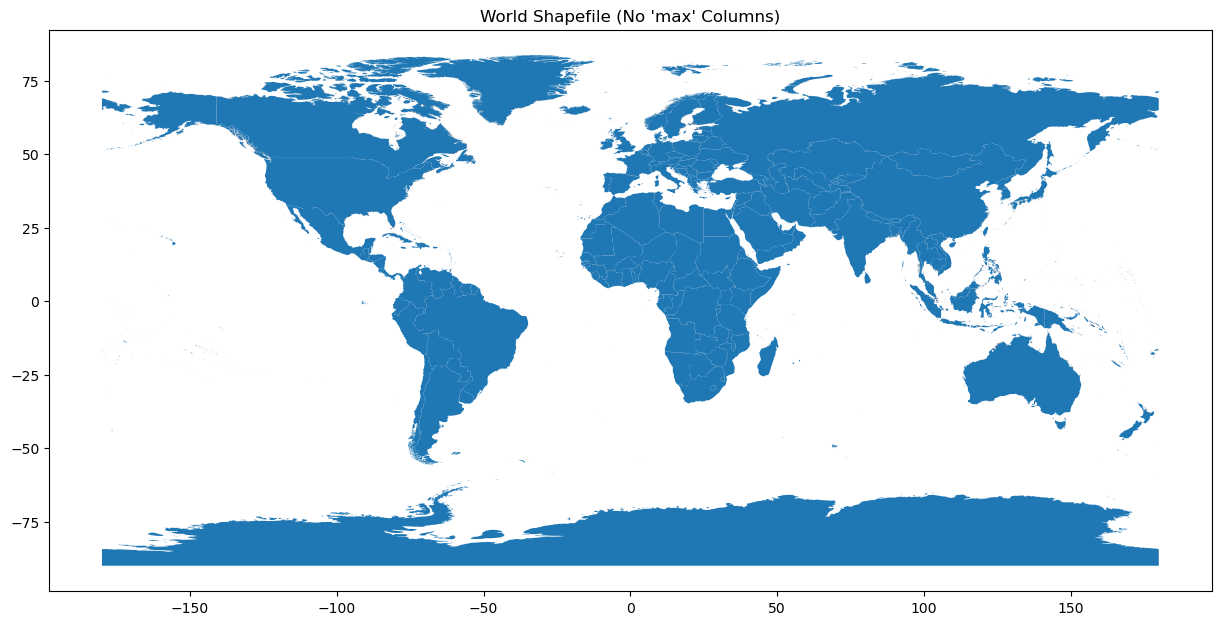

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))
df_no_max_gdf.plot(ax=ax)
plt.title("World Shapefile (No 'max' Columns)")
plt.show()